In [1]:
import statsmodels.api as sm
# from statsmodels.stats.multitest import multipletests as mpt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# import itertools
import seaborn as sns
# %pylab inline

In [2]:
save_path = 'G:/HuBMAP/B008_12/analysis/CRC_analysis/'
cells2 = pd.read_csv("G:/HuBMAP/B008_12/Neighborhoods/05_25_HuBMAP_tunit.csv", index_col=0)
cells2.reset_index(inplace=True, drop=True)
cells2

C:\Users\akoya-stanford\Anaconda3\envs\Up_Scanpy\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (62,63,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MUC2,SOX9,MUC1,CD31,Synapto,CD49f,CD15,CHGA,CDX2,ITLN1,...,machine,MUC6,Neighborhood,Neighborhood_Ind,Neigh_sub,NeighInd_sub,Community,Major Community,Tissue Segment,Tissue Unit
0,-0.303994,-0.163727,-0.587608,-0.212903,0.164173,-0.664863,0.049305,0.003616,-0.377532,-0.450794,...,NaN,NaN,Mature Epithelial,Mature Epithelial,Epithelial,Epithelial,Plasma Cell Enriched,Immune,Mucosa,Mucosa
1,-0.301927,-0.491706,-0.500804,-0.243205,-0.142568,-0.664861,-0.182627,-0.117573,-0.182754,-0.236199,...,NaN,NaN,Transit Amplifying Zone,Mature Epithelial,Epithelial,Epithelial,Mature Epithelial,Epithelial,Mucosa,Mucosa
2,-0.302206,-0.547234,-0.510705,-0.235309,-0.217185,-0.622758,-0.296486,-0.091504,-0.268055,-0.355383,...,NaN,NaN,Innate Immune Enriched,Innate Immune Enriched,Immune,Immune,Innate Immune Enriched,Immune,Mucosa,Mucosa
3,-0.294644,-0.615593,-0.570580,-0.247548,-0.042246,-0.642230,-0.299031,-0.121458,-0.377533,-0.450797,...,NaN,NaN,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa,Mucosa
4,-0.298609,-0.272162,-0.587607,-0.228376,-0.266695,-0.664864,-0.237499,-0.121460,-0.168489,-0.430944,...,NaN,NaN,Outer Follicle,Outer Follicle,Immune,Immune,Follicle,Immune,Mucosa,Mucosa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511997,0.251624,-0.360296,-0.254984,-0.229060,0.154796,-0.218688,-0.350372,-0.112132,-0.142597,-0.352178,...,Skywalker,NaN,Innervated Stroma,Innervated Smooth Muscle,Stromal,Stromal,Stroma,Stroma,Subucosa,Muscularis externa
2511998,-0.274299,-0.465097,-0.367546,-0.210402,-0.204488,-0.259962,-0.333110,-0.103590,-0.213387,-0.342405,...,Skywalker,NaN,Stroma,Stroma,Stromal,Stromal,Stroma,Stroma,Subucosa,Muscularis externa
2511999,-0.260292,-0.397157,-0.352751,-0.200957,0.427470,-0.061012,-0.363492,-0.109572,-0.172711,-0.357500,...,Skywalker,NaN,Stroma,Smooth Muscle,Stromal,Stromal,Stroma,Stroma,Subucosa,Muscularis externa
2512000,-0.073782,-0.020896,-0.365204,-0.102411,-0.218278,-0.266579,-0.337989,-0.103707,-0.072134,-0.328749,...,Skywalker,NaN,Microvasculature,Microvasculature,Stromal,Stromal,Stroma,Stroma,Subucosa,Muscularis externa


In [3]:
cells2['donor_tis'] = cells2['donor']+'_'+cells2['tissue']

In [4]:
neigh_num = {list(cells2['Neighborhood'].unique())[i]:i for i in range(len(cells2['Neighborhood'].unique()))}
cells2['neigh_num'] = cells2['Neighborhood'].map(neigh_num)
cells2['neigh_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [5]:
treatment_dict = {'SB':0, 'CL':1}
cells2['group']=cells2['tissue'].map(treatment_dict)
cells2['group'].unique()

pat_dict = {}
for i in range(len(list(cells2['donor_tis'].unique()))):
    pat_dict[list(cells2['donor_tis'].unique())[i]] = i
pat_dict

cells2['patients']=cells2['donor_tis'].map(pat_dict)
cells2['patients'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [6]:
pat_gp = cells2[['patients','group']].drop_duplicates()
pat_to_gp= {a:b for a,b in pat_gp.values}

In [7]:
ct_freq1 = cells2.groupby(['patients']).apply(lambda x: x['Cell Type'].value_counts(normalize = True,sort = False)*100)
#ct_freq = ct_freq1.to_frame()
ct_freq = ct_freq1.unstack().fillna(0)
ct_freq.reset_index(inplace=True)
ct_freq.rename(columns={'level_1':'cell_type', 'Cell Type':'Percentage'}, inplace=True)
ct_freq

,patients,B,CD4+ T cell,CD57+ Enterocyte,CD66+ Enterocyte,CD7+ Immune,CD8+ T,Cycling TA,DC,Endothelial,...,MUC1+ Enterocyte,NK,Nerve,Neuroendocrine,Neutrophil,Paneth,Plasma,Smooth muscle,Stroma,TA
0,0,2.806577,4.753555,0.028924,9.935553,0.157277,3.680638,4.405557,1.262734,5.878897,...,0.839713,0.051522,3.011760,0.465503,0.382345,0.001808,9.473665,14.218181,5.474858,2.332939
1,1,4.757271,5.505654,0.006028,3.303565,0.122290,3.201082,4.493743,1.670729,7.963520,...,0.156738,0.055117,3.973578,0.662263,0.101622,0.287641,3.058984,16.986316,7.046341,3.317344
2,2,3.319723,5.029751,0.026174,4.389363,0.101206,4.139838,5.716380,2.446387,6.050533,...,0.490324,0.056710,3.533476,0.861121,0.335026,0.018322,5.203371,13.623515,8.017065,5.137936
3,3,0.640266,3.812189,0.028456,1.875741,0.043159,3.796064,2.293574,1.618686,6.986009,...,0.410719,0.196822,5.124022,0.287408,0.689590,0.002846,3.638606,28.447712,10.262746,2.051696
4,4,0.111444,3.627457,0.025718,5.741228,0.111444,2.975935,4.756598,2.199498,7.824383,...,2.133366,0.247382,2.659972,0.301268,0.175127,0.001225,4.424714,23.829527,11.006062,2.462801
5,5,0.021313,3.087235,0.009591,4.006906,0.112961,2.607686,6.066839,1.727445,5.688527,...,1.896886,0.229118,2.803768,0.311175,2.161171,0.000000,5.503101,16.510369,16.883352,2.944436
6,6,0.110968,4.164414,0.032671,2.436235,0.435424,4.371705,2.302172,1.382317,6.117908,...,0.957032,0.484431,1.876887,0.496260,0.508652,0.002816,6.267180,12.494367,8.607093,1.406539
7,7,0.322628,3.638730,0.000000,0.846898,0.094405,3.583737,4.100675,1.021044,7.230716,...,0.596678,0.004583,4.663440,0.244721,0.220890,0.002750,5.446180,30.536002,16.012245,0.236472
8,8,0.283323,4.411124,0.050853,1.007613,1.024322,8.960277,5.046058,0.684334,6.859326,...,0.202685,0.015256,4.006480,0.770784,1.155813,0.582629,5.320664,16.447999,5.758725,1.277860
9,9,4.816753,6.362775,0.097796,0.548140,0.213099,14.198526,2.191958,0.949587,7.031651,...,0.373677,0.156956,2.456369,0.828247,0.161786,1.512819,4.482315,8.807674,4.202208,4.290345


In [8]:
all_freqs1 = cells2.groupby(['patients','neigh_num']).apply(lambda x: x['Cell Type'].value_counts(normalize = True,sort = False)*100)
#all_freqs = all_freqs1.to_frame()
all_freqs = all_freqs1.unstack().fillna(0)
all_freqs.reset_index(inplace=True)
all_freqs.rename(columns={'level_2':'cell_type', 'Cell Type':'Percentage'}, inplace=True)
all_freqs

,patients,neigh_num,B,CD4+ T cell,CD57+ Enterocyte,CD66+ Enterocyte,CD7+ Immune,CD8+ T,Cycling TA,DC,...,MUC1+ Enterocyte,NK,Nerve,Neuroendocrine,Neutrophil,Paneth,Plasma,Smooth muscle,Stroma,TA
0,0,0,0.034124,0.238867,0.051186,6.415287,0.051186,4.009555,0.750725,0.051186,...,2.559290,0.017062,0.272991,0.221805,0.068248,0.017062,0.255929,1.091964,0.187681,0.375363
1,0,1,0.282068,0.803893,0.056414,4.922079,0.091672,2.743107,21.641633,0.465411,...,1.981525,0.021155,0.923771,1.692405,0.204499,0.000000,2.136662,3.695085,1.015443,11.071152
2,0,2,1.004343,4.315961,0.054289,1.384365,0.217155,1.710098,0.461455,3.773073,...,0.027144,0.108578,4.397394,0.380022,1.194354,0.000000,4.234528,4.641694,6.894680,0.244300
3,0,3,13.207941,50.282132,0.000000,0.543365,1.233020,6.729363,0.815047,3.594566,...,0.000000,0.334378,1.650993,0.083595,0.480669,0.000000,4.054336,2.779519,3.072100,0.083595
4,0,4,3.008204,10.711030,0.045579,1.504102,0.455789,19.826800,1.823154,4.010939,...,0.182315,0.000000,5.104831,0.319052,2.461258,0.000000,9.434822,7.748405,5.515041,0.729262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,15,15,0.050142,2.991810,0.000000,0.217282,0.083570,1.286980,0.016714,1.136554,...,0.016714,0.050142,1.972255,0.000000,0.501421,0.200568,1.403978,35.851579,10.713689,0.000000
309,15,16,0.007971,0.239139,0.000000,0.023914,0.007971,0.255082,0.000000,0.255082,...,0.007971,0.007971,3.332005,0.000000,0.031885,0.095656,0.055799,84.679155,7.293743,0.000000
310,15,17,0.153492,3.683807,0.729087,0.460476,0.134305,5.199540,1.650038,0.633154,...,0.383730,0.364543,0.460476,1.323868,0.191865,50.825019,0.786646,2.302379,3.875672,0.920952
311,15,18,0.130085,3.127033,0.020013,0.300195,0.070046,1.320859,0.040026,0.680442,...,0.060039,0.025016,2.906889,0.060039,0.380247,0.260169,1.130735,4.713063,62.250463,0.025016


In [9]:
'''
preparing dataframes (best to do this on your data):
ct_freq should be a df of cell type frequencies per patient

all_freqs should have cols patient, neighborhood, cell types, giving
the frequency of cells of that type in that neighborhood in that patient
'''
#you will need to set the following with your own data
neighborhood_col = 'neigh_num'
nbs = list(cells2['neigh_num'].unique())
patients = list(cells2['patients'].unique()) 
group = pd.Series(pat_to_gp)
cells = list(cells2['Cell Type'].unique())
#cells = ['Tumor','CD4+ Treg']
cells1 = cells.copy()
cells1.append('patients')
cells1

['NK',
 'Enterocyte',
 'MUC1+ Enterocyte',
 'TA',
 'CD66+ Enterocyte',
 'Paneth',
 'Smooth muscle',
 'M1 Macrophage',
 'Goblet',
 'Neuroendocrine',
 'CD57+ Enterocyte',
 'Lymphatic',
 'CD8+ T',
 'DC',
 'M2 Macrophage',
 'B',
 'Neutrophil',
 'Endothelial',
 'Cycling TA',
 'Plasma',
 'CD4+ T cell',
 'Stroma',
 'Nerve',
 'ICC',
 'CD7+ Immune',
 'patients']

In [10]:
def normalize(X):
    arr = np.array(X.fillna(0).values)
    return pd.DataFrame(np.log2(1e-3 + arr/arr.sum(axis =1, keepdims = True)), index = X.index.values, columns = X.columns).fillna(0)


In [11]:
# data prep
# normalized overall cell type frequencies
X_cts = normalize(ct_freq.reset_index().set_index('patients').loc[patients,cells])

# normalized neighborhood specific cell type frequencies
df_list = []

for nb in nbs:
    cond_nb = all_freqs.loc[all_freqs[neighborhood_col]==nb,cells1].rename({col: col+'_'+str(nb) for col in cells},axis = 1).set_index('patients')
    df_list.append(normalize(cond_nb))

X_cond_nb = pd.concat(df_list,axis = 1).loc[patients]

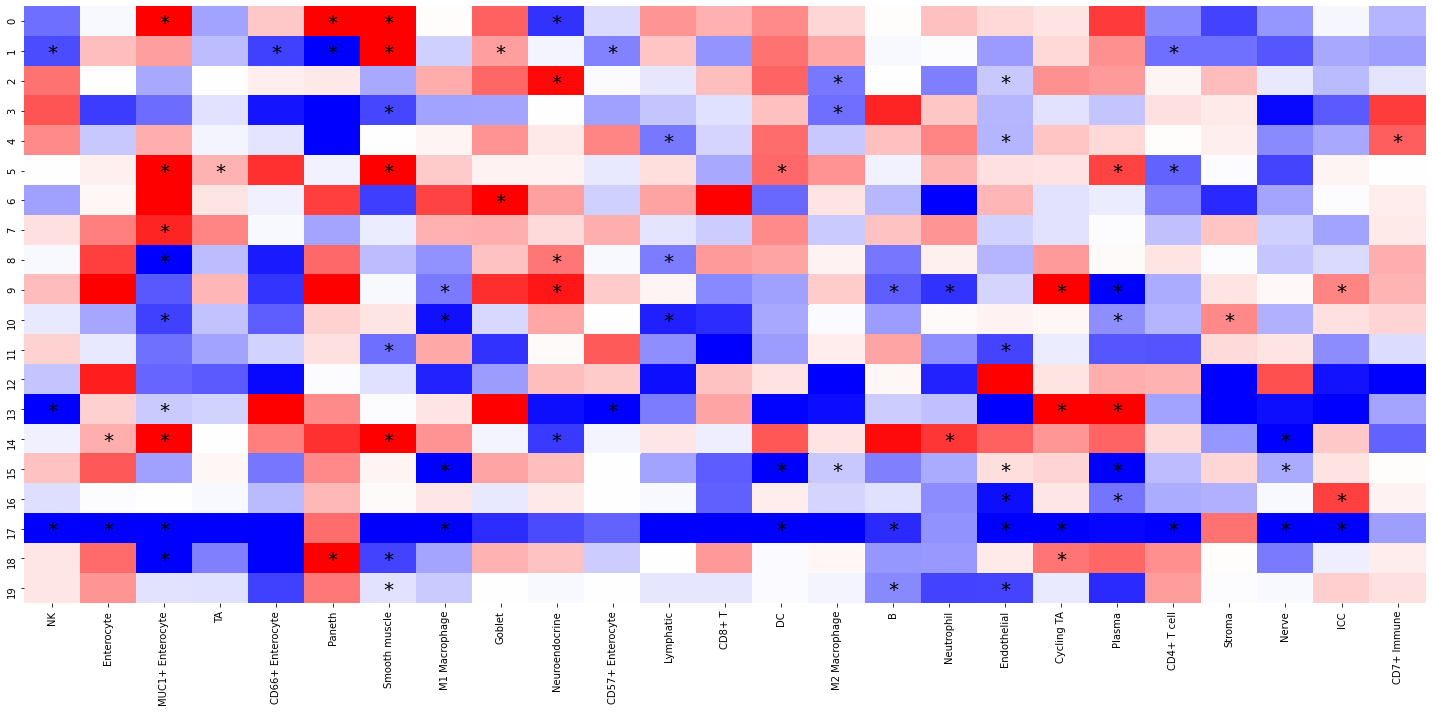

In [12]:
#differential enrichment for all cell subsets
changes = {}
#nbs =[0, 2, 3, 4, 6, 7, 8, 9]
for col in cells:
    for nb in nbs:
        #build a design matrix with a constant, group 0 or 1 and the overall frequencies
        X = pd.concat([X_cts[col], group.astype('int'),pd.Series(np.ones(len(group)), index = group.index.values)],axis = 1).values
        if col+'_%d'%nb in X_cond_nb.columns:
            #set the neighborhood specific ct freqs as the outcome
            Y = X_cond_nb[col+'_%d'%nb].values
            X = X[~pd.isna(Y)]
            Y = Y[~pd.isna(Y)]
            #fit a linear regression model
            results = sm.OLS(Y,X).fit()
            #find the params and pvalues for the group coefficient
            changes[(col,nb)] = (results.pvalues[1], results.params[1])
        

#make a dataframe with coeffs and pvalues
dat = (pd.DataFrame(changes).loc[1].unstack())
dat = pd.DataFrame(np.nan_to_num(dat.values),index = dat.index, columns = dat.columns).T.sort_index(ascending=True).loc[:,X_cts.columns]
pvals = (pd.DataFrame(changes).loc[0].unstack()).T.sort_index(ascending=True).loc[:,X_cts.columns]

#this is where you should correct pvalues for multiple testing 


#plot as heatmap
f, ax = plt.subplots(figsize = (20,10))
g = sns.heatmap(dat,cmap = 'bwr', vmin = -1, vmax = 1,cbar=False,ax = ax)
for a,b in zip(*np.where (pvals<0.05)):
    plt.text(b+.5,a+.55,'*',fontsize = 20,ha = 'center',va = 'center')
plt.tight_layout()


In [ ]:
inv_map = {v: k for k, v in neigh_num.items()}
inv_map

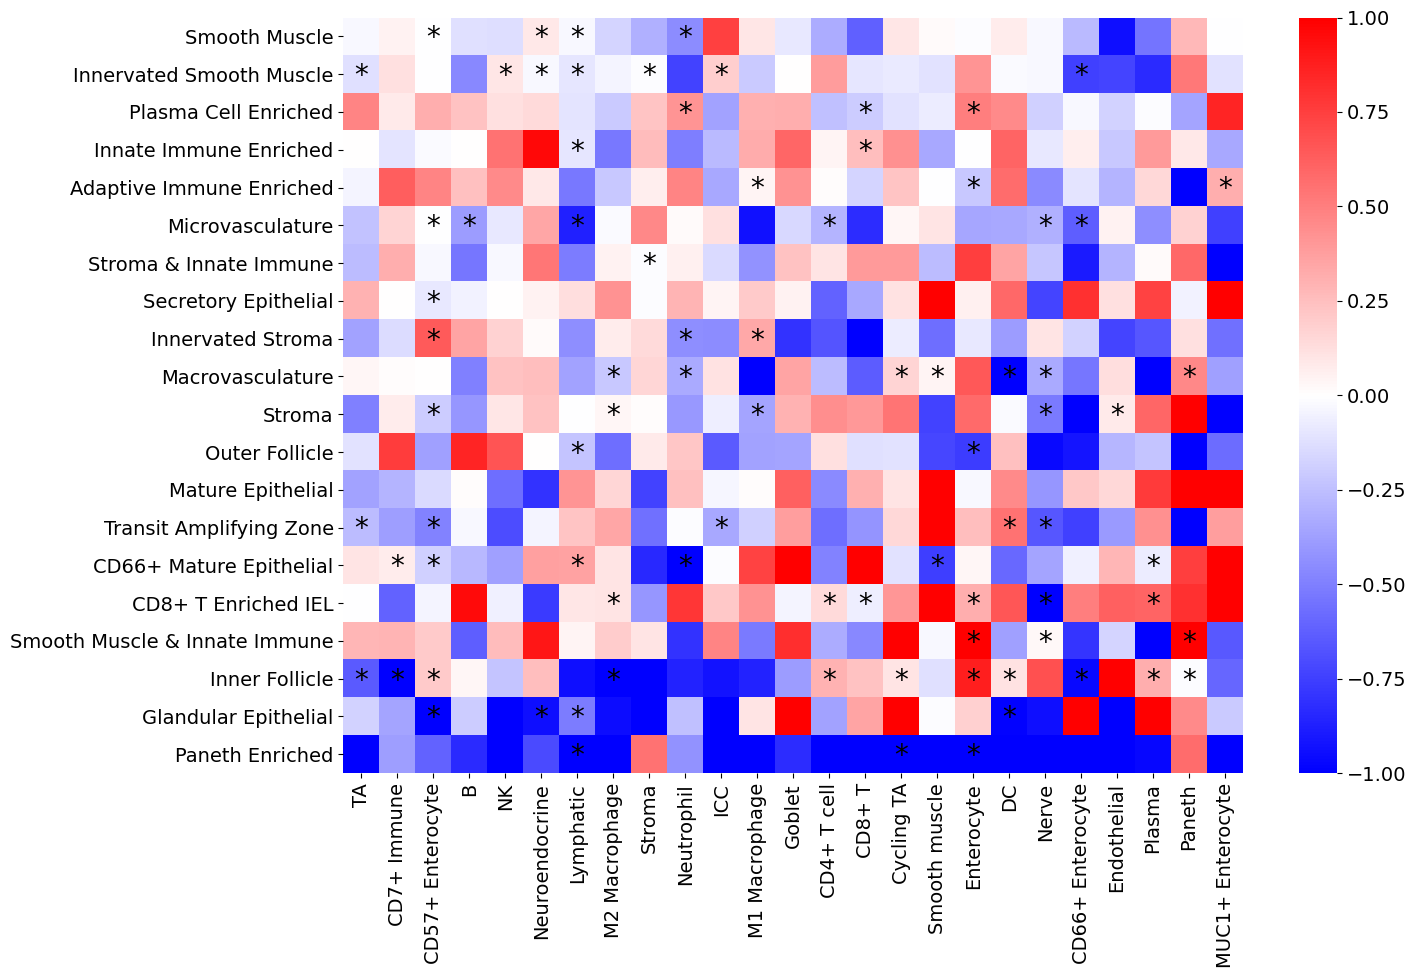

In [27]:
#plot as heatmap

plt.style.use(['default'])
#GENERAL GRAPH SETTINGs
#font size of graph
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

#Settings for graph
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

data_2 = dat.rename(index=inv_map)


#Sort both axes
sort_sum = data_2.abs().sum(axis=1).to_frame()
sort_sum.columns = ['sum_col']
xx = sort_sum.sort_values(by='sum_col')
sort_x = xx.index.values.tolist()
sort_sum_y = data_2.abs().sum(axis=0).to_frame()
sort_sum_y.columns = ['sum_col']
yy = sort_sum_y.sort_values(by='sum_col')
sort_y = yy.index.values.tolist()
df_sort = data_2.reindex(index = sort_x, columns =sort_y)


f, ax = plt.subplots(figsize = (15,10))
g = sns.heatmap(df_sort,cmap = 'bwr', vmin = -1, vmax = 1,cbar=True,ax = ax)
for a,b in zip(*np.where (pvals<0.05)):
    plt.text(b+.5,a+.55,'*',fontsize = 20,ha = 'center',va = 'center')
plt.tight_layout()

f.savefig(save_path+"tissue_neighborhood_coeff_pvalue_bar.png", format='png', dpi=300, transparent=True, bbox_inches='tight')


In [29]:
df_sort.abs().sum()

TA                   5.554002
CD7+ Immune          5.947397
CD57+ Enterocyte     6.571617
B                    7.136955
NK                   7.524488
Neuroendocrine       7.554287
Lymphatic            7.746581
M2 Macrophage        8.053861
Stroma               8.274285
Neutrophil           9.013222
ICC                  9.234485
M1 Macrophage        9.582909
Goblet               9.656196
CD4+ T cell         10.305417
CD8+ T              10.705790
Cycling TA          10.991180
Smooth muscle       11.295171
Enterocyte          11.476021
DC                  11.528136
Nerve               11.634150
CD66+ Enterocyte    12.399633
Endothelial         12.469513
Plasma              12.695586
Paneth              13.875909
MUC1+ Enterocyte    16.224375
dtype: float64